In [1]:
import funflow as ff
# import numpy as np
# import pandas as pd
# from matplotlib import pyplot as plt
# import seaborn as sns

In [2]:
def compute_residuals(X_train, factors_train, X_test, factors_test):
    return True, True

In [3]:
def fit_laplacian(X_train, laplacian_method):
    return True

In [4]:
def predict_laplacian_residuals(X_test, laplacian):
    return True

In [11]:
# rename_layer = ff.Rename({"X_csore": "X_train, kind=returns"})

compute_residuals_layers = ff.GridMap(compute_residuals,
                                      inputs=["returns_train", "factors_train", "returns_test", "factors_test"],
                                      outputs=[ff.Template("score_train", [ff.Tag("kind", "residuals")]),
                                               ff.Template("score_test", [ff.Tag("kind", "residuals")])],
                                      name="Compute Score - Residuals", 
                                     )

returns_score_layer = ff.Functional(lambda x, y: (x, y), 
                                    inputs=["returns_train", "returns_test"],
                                    outputs=[ff.Template("score_train", [ff.Tag("kind", "returns")]),
                                             ff.Template("score_test", [ff.Tag("kind", "returns")])],
                                    name="Compute Score - Returns",
                                    call_type="args"
                                   )

fit_laplacian_layer = ff.GridMap(fit_laplacian,
                                 inputs=["score_train", "laplacian_method"],
                                 outputs=["laplacian"],
                                 name="Fit Laplacian"
                                )


pred_lapl_residuals_layer = ff.GridMap(predict_laplacian_residuals,
                                 inputs=["score_test", "laplacian"],
                                 outputs=["final_score_test"],
                                 name="Compute Final Scores"
                                )

compute_laplacian_residuals_model = ff.Model([compute_residuals_layers, returns_score_layer, fit_laplacian_layer, pred_lapl_residuals_layer],
                                       inputs=["returns_train", "returns_test", "factors_train", "factors_test", "laplacian_method"],
                                       outputs=[]
                                      )

In [12]:
user_inputs = {"returns_train": None, "returns_test": None, 
               "factors_train, factor_type:Fama-French": None, "factors_test, factor_type:Fama-French": None,
               "factors_train, factor_type:CAPM": None, "factors_test, factor_type:CAPM": None,
               "laplacian_method, method:Identity": None, "laplacian_method, method:Corr-50": None, "laplacian_method, method:Laplacian": None,
              }

In [13]:
compute_laplacian_residuals_model(**user_inputs)

{'returns_train': None,
 'returns_test': None,
 'factors_train, factor_type: Fama-French': None,
 'factors_test, factor_type: Fama-French': None,
 'factors_train, factor_type: CAPM': None,
 'factors_test, factor_type: CAPM': None,
 'laplacian_method, method: Identity': None,
 'laplacian_method, method: Corr-50': None,
 'laplacian_method, method: Laplacian': None,
 'score_train, factor_type: Fama-French, kind: residuals': True,
 'score_test, factor_type: Fama-French, kind: residuals': True,
 'score_train, factor_type: CAPM, kind: residuals': True,
 'score_test, factor_type: CAPM, kind: residuals': True,
 'score_train, kind: returns': None,
 'score_test, kind: returns': None,
 'laplacian, kind: returns, method: Laplacian': True,
 'laplacian, kind: returns, method: Corr-50': True,
 'laplacian, kind: returns, method: Identity': True,
 'laplacian, factor_type: Fama-French, kind: residuals, method: Laplacian': True,
 'laplacian, factor_type: Fama-French, kind: residuals, method: Corr-50': Tr

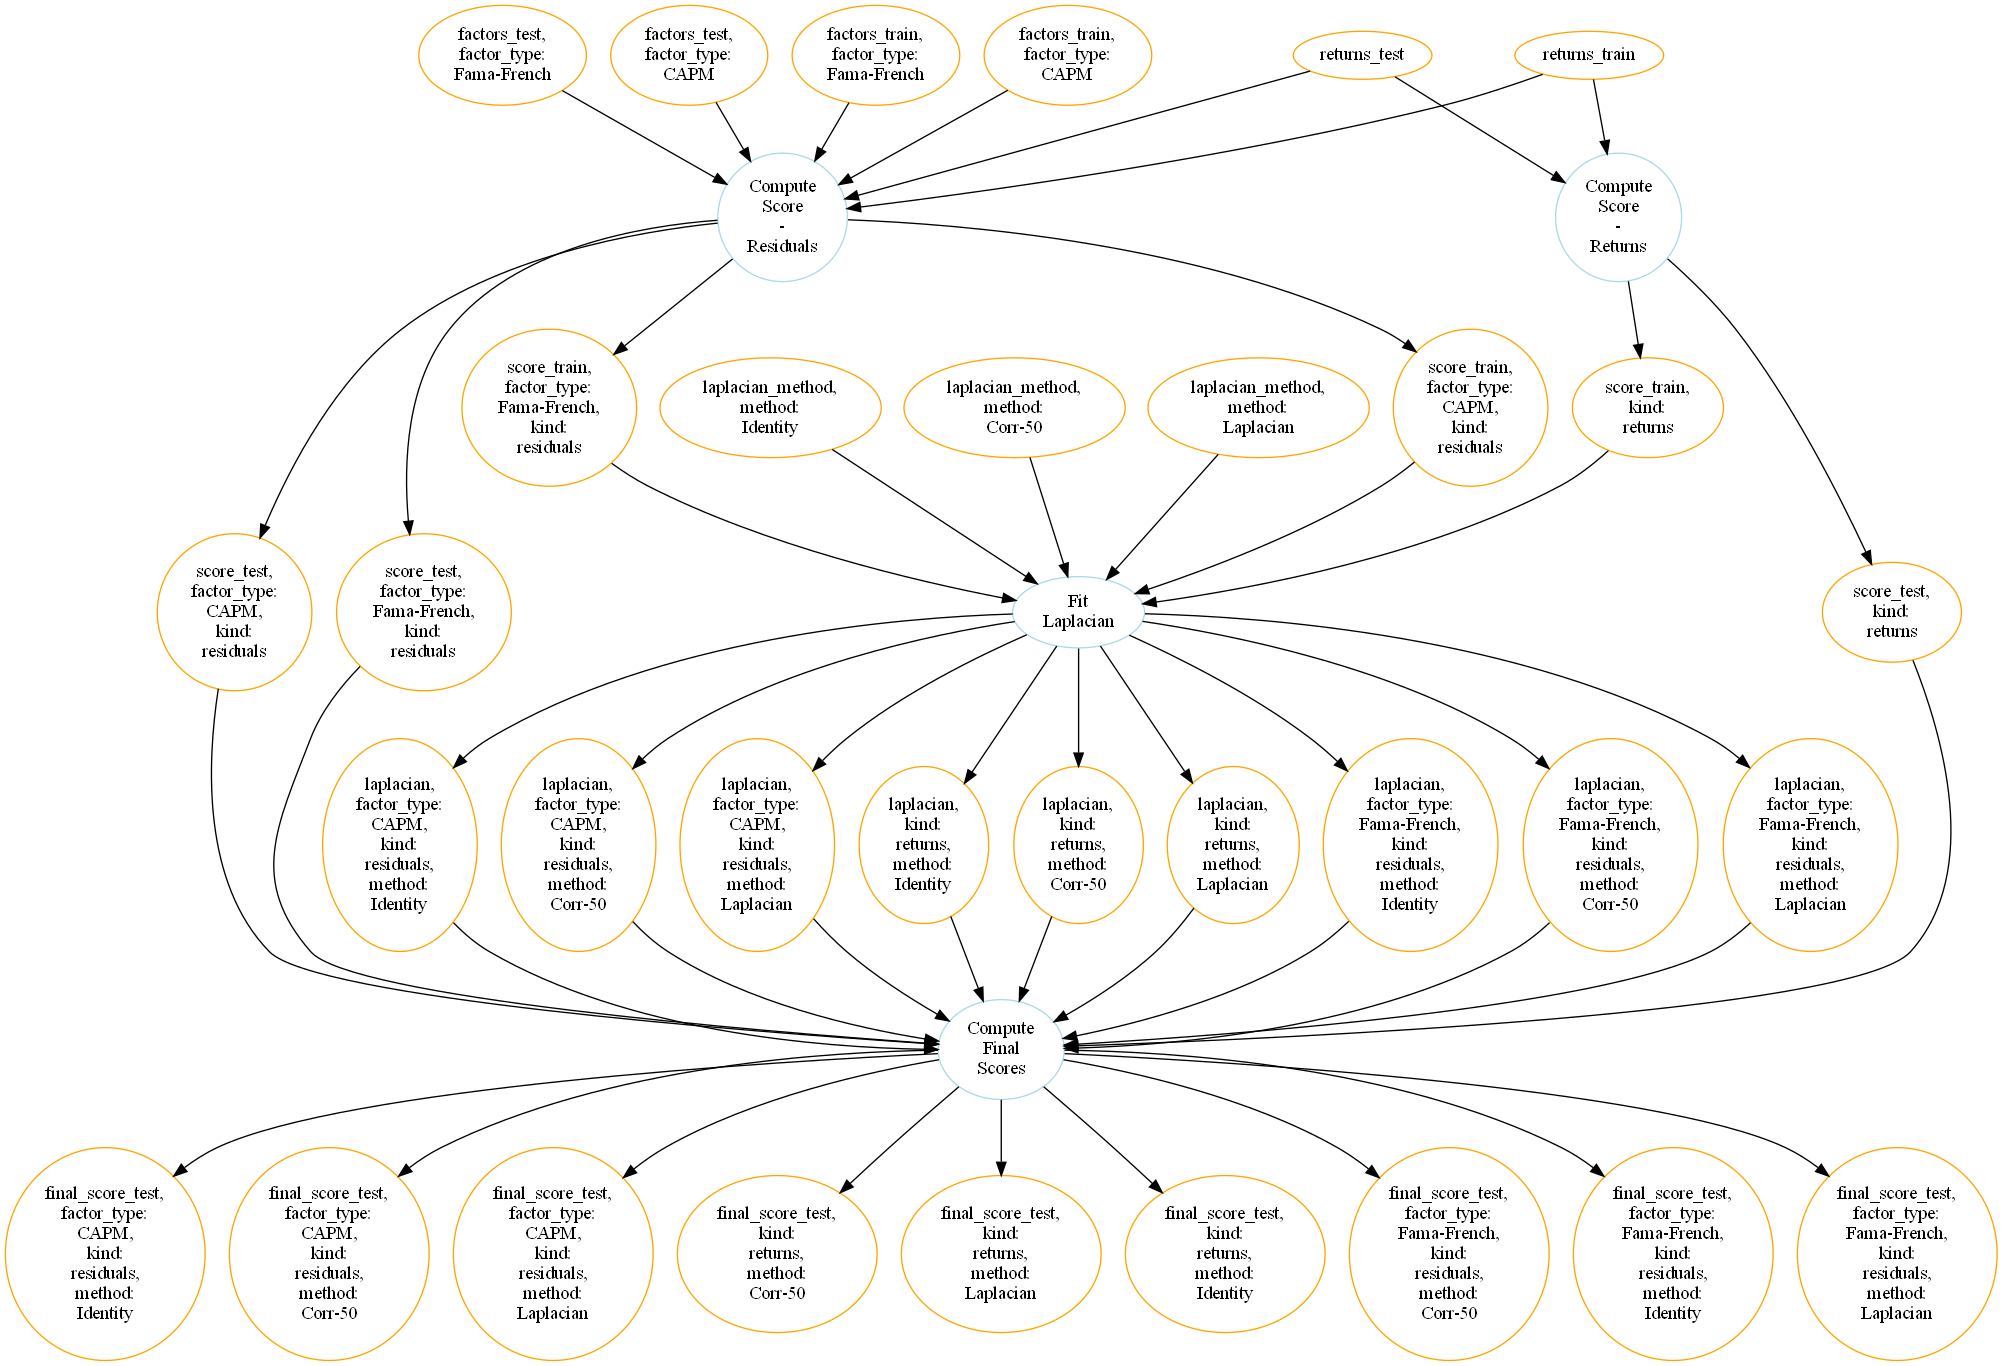

In [33]:
from IPython.display import Image
import networkx as nx
G = compute_laplacian_residuals_model.create_graph(user_inputs)
A = nx.nx_agraph.to_agraph(G)
A.draw('stats_arb_graph.png', prog="dot")
Image('stats_arb_graph.png')

In [14]:
import pathlib
pathlib.Path(__file__).parents[2].resolve().as_posix()

NameError: name '__file__' is not defined